<a href="https://colab.research.google.com/github/bit-2byte/ML/blob/main/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('display.max_columns',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data/Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data/Zomato Restaurant reviews.csv')

# EXPLORING THE DATASET

In [ ]:
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
df2.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [ ]:
df1.size

630

In [ ]:
df2.size

70000

# Cheking null value in data set

In [ ]:
df1.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
df2.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
df1.describe(include = 'all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
 df2.describe(include ='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


# Exploratory Data Analysis
**bold text**

In [ ]:
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
cost_transform={
    '800':800,
    '1200' :1200,
    '1500' : 1500,
    '500' : 500,
    '300' : 300,
    '1000': 1000,
    '350' : 350,
    '400' : 400,
    '1,600' :1600,
    '750' : 750,
    '550' : 550,
    '1,900' : 1900,
    '450' : 450,
    '150' : 150,
    '1,400' : 1400,
    '1,100' : 1100,
    '600' : 600,
    '200' : 200,
    '900' : 900,
    '700' : 700,
    '1,700' : 1700,
    '2,500' : 2500,
    '850' : 850,
    '650' : 650,
    '1,800' : 1800,
    '2,800' : 2800,
    '1,750' : 1750,
    '250' : 250

}
df1['cost']=df1.Cost.map(cost_transform)
df1.drop('Cost',axis=1,inplace=True)


<Axes: xlabel='cost', ylabel='Count'>

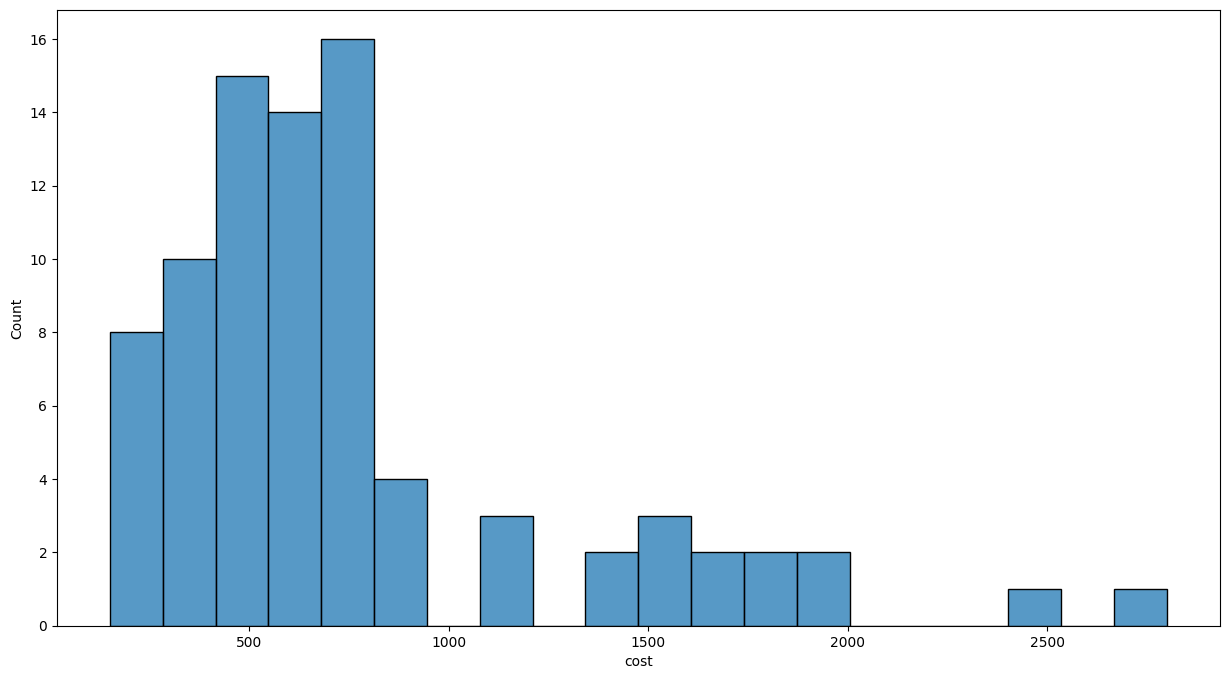

In [ ]:
 #the below graph shows the distribution of cost column
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
sns.histplot(df1.cost)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings'),
  Text(1, 0, "Hyderabad's Hottest"),
  Text(2, 0, "Great Buffets, Hyderabad's Hottest"),
  Text(3, 0, 'Late Night Restaurants'),
  Text(4, 0, "Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest"),
  Text(5, 0, "Sunday Brunches, Corporate Favorites, Great Buffets, Hyderabad's Hottest, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated"),
  Text(6, 0, 'Food Hygiene Rated Restaurants in Hyderabad'),
  Text(7, 0, 'Great Buffets, Live Sports Screenings, Best Bars & Pubs, Trending This Week'),
  Text(8, 0, 'Frozen Delights'),
  Text(9, 

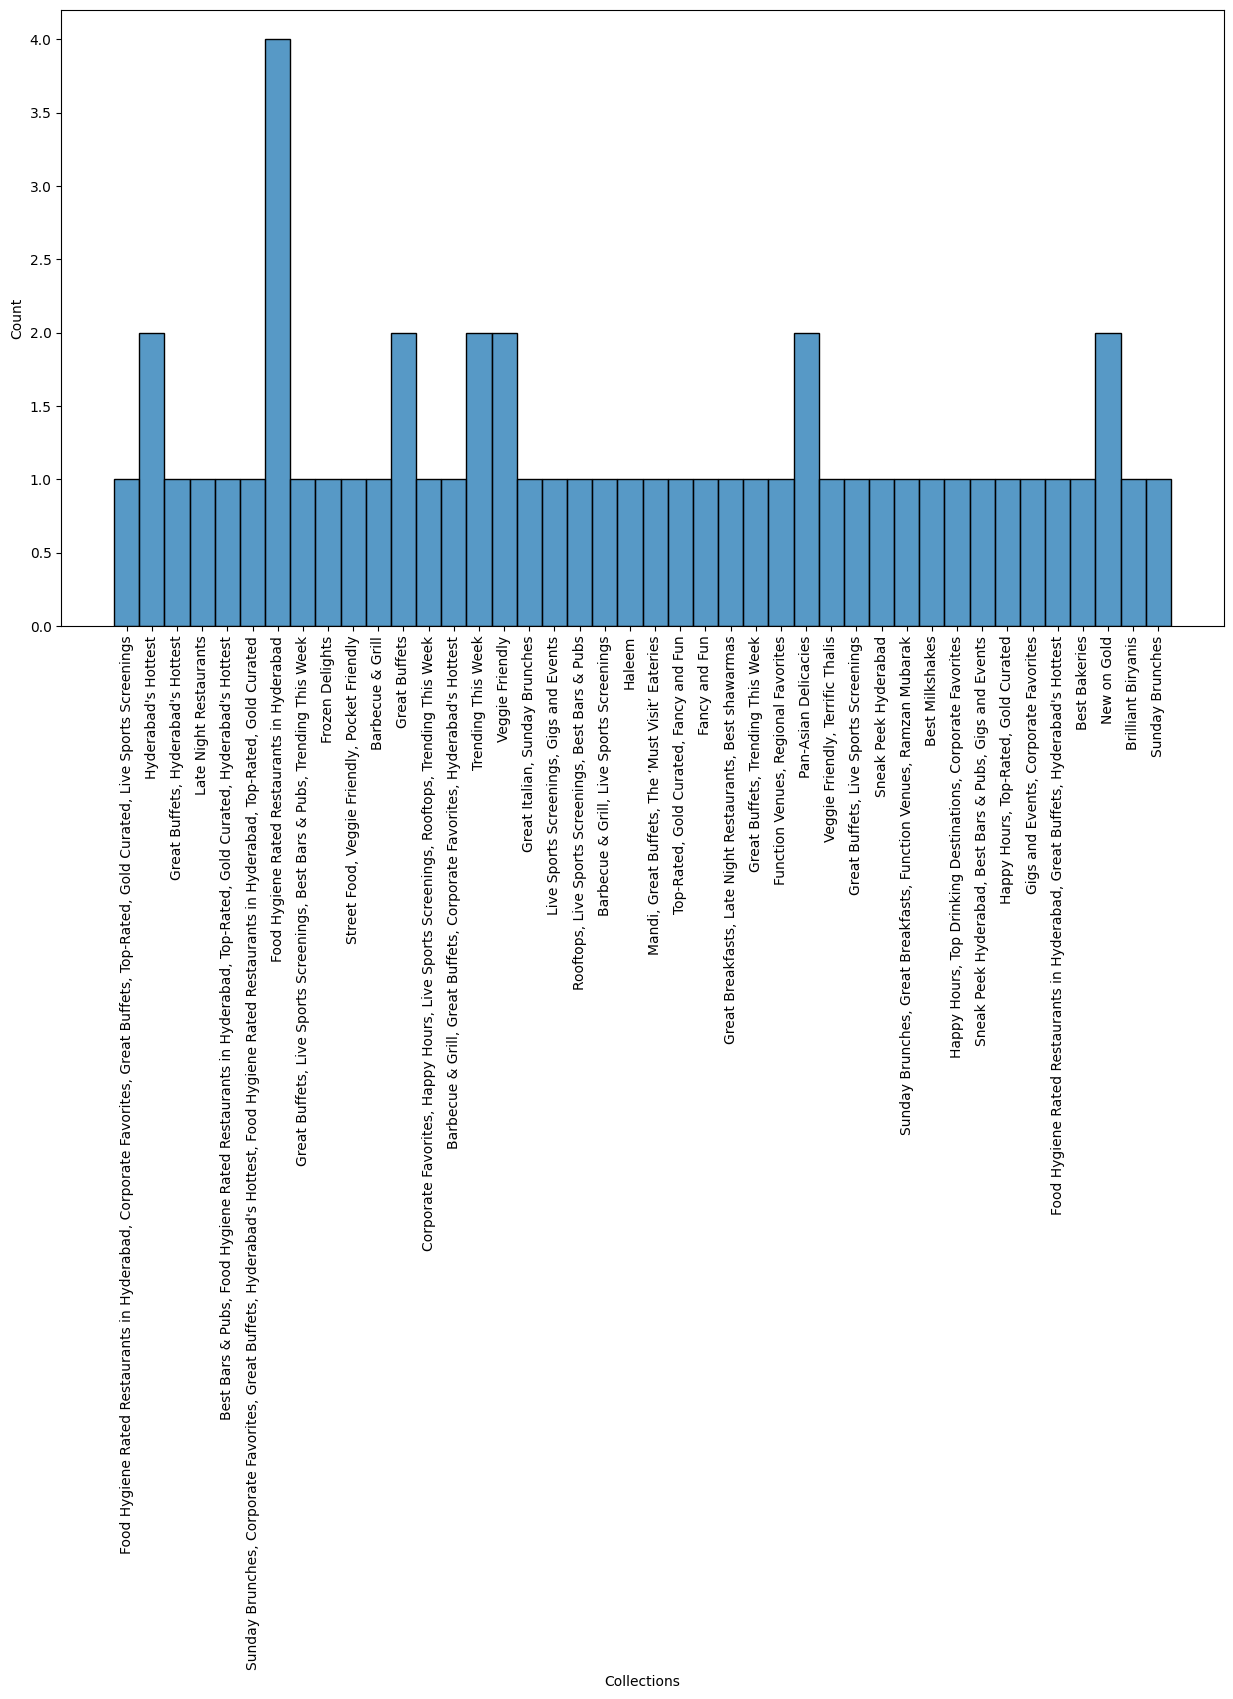

In [ ]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
sns.histplot(df1.Collections)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 [Text(0, 0, 'Barbecue & Grill'),
  Text(1, 0, "Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest"),
  Text(2, 0, 'Barbecue & Grill, Live Sports Screenings'),
  Text(3, 0, 'Best Bakeries'),
  Text(4, 0, "Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest"),
  Text(5, 0, 'Best Milkshakes'),
  Text(6, 0, 'Brilliant Biryanis'),
  Text(7, 0, 'Corporate Favorites, Happy Hours, Live Sports Screenings, Rooftops, Trending This Week'),
  Text(8, 0, 'Fancy and Fun'),
  Text(9, 0, 'Food Hygiene Rated Restaurants in Hyderabad'),
  Text(10, 0, 'Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings'),
  Text

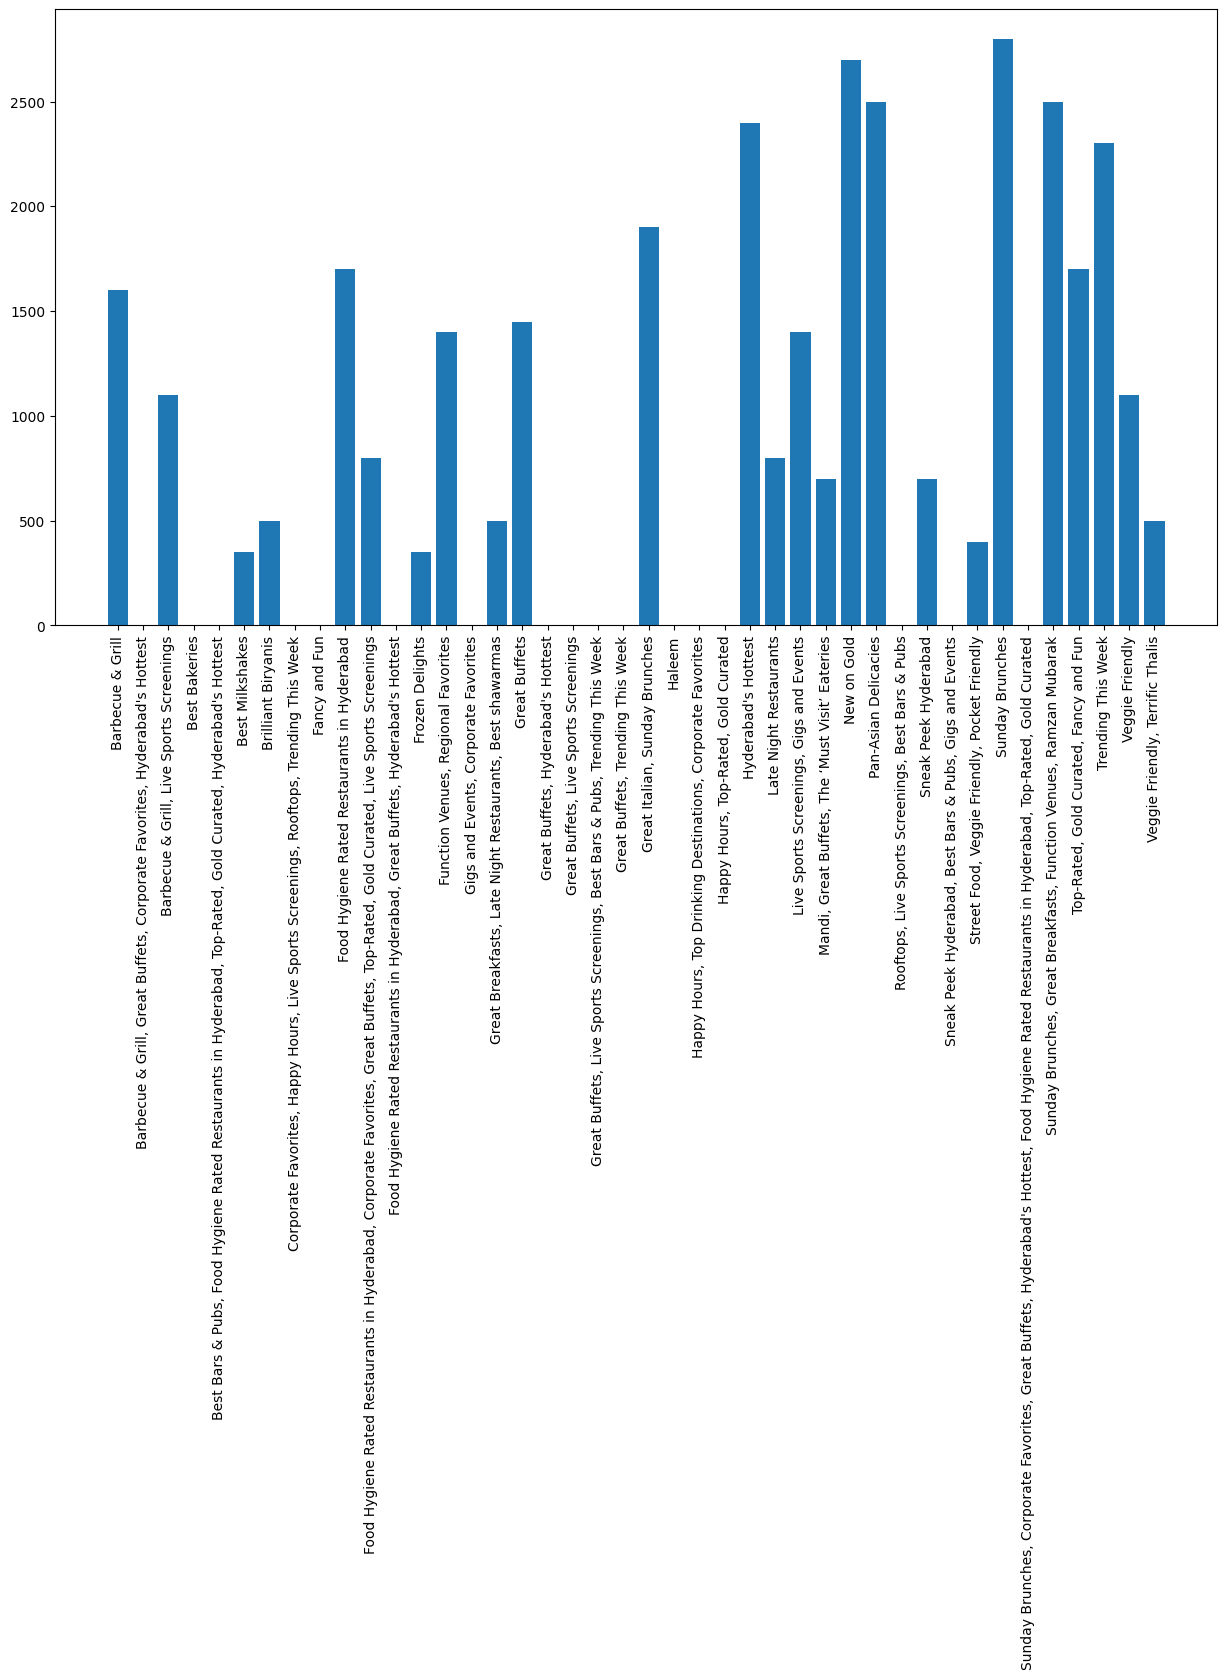

In [ ]:
#the graph shows the cost and collection relation
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df=df1.groupby(['Collections'])['cost'].sum().reset_index()
plt.bar(df['Collections'],df['cost'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91],
 [Text(0, 0, 'American'),
  Text(1, 0, 'American, Chinese, North Indian, Kebab, South Indian'),
  Text(2, 0, 'American, Fast Food, Salad, Burger'),
  Text(3, 0, 'American, Wraps, Desserts'),
  Text(4, 0, 'Andhra, Biryani, Hyderabadi, North Indian'),
  Text(5, 0, 'Andhra, North Indian, Chinese'),
  Text(6, 0, 'Andhra, South Indian, North Indian'),
  Text(7, 0, 'Arabian, North Indian, Chinese'),
  Text(8, 0, 'Asian'),
  Text(9, 0, 'Asian, Continental, Nor

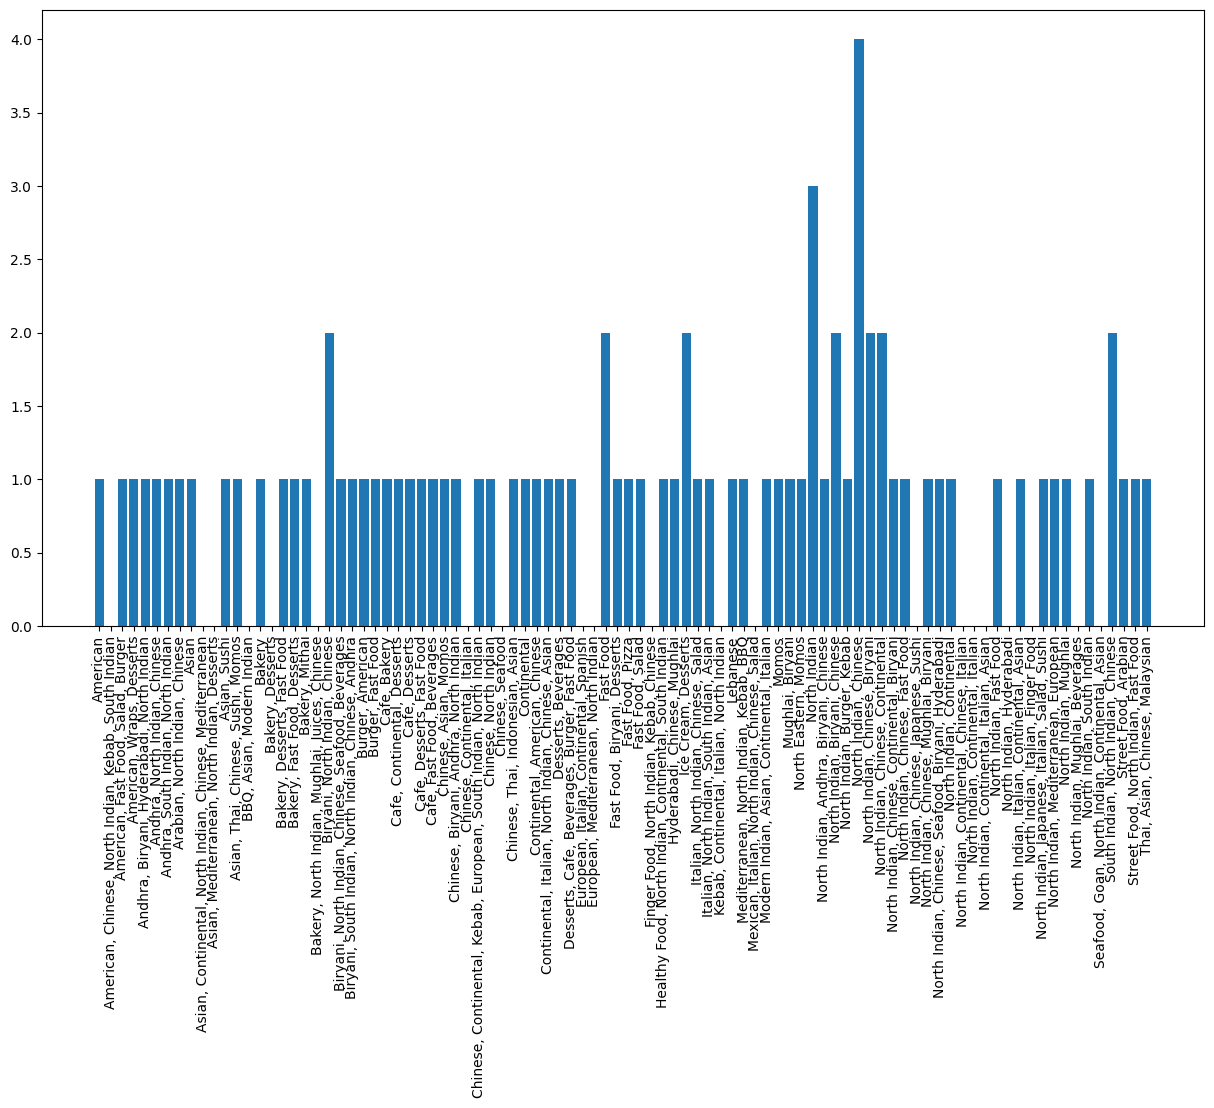

In [ ]:
df=df1.groupby(['Cuisines'])['cost'].count().reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
plt.bar(df['Cuisines'],df['cost'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104],
 [Text(0, 0, '10 Downing Street'),
  Text(1, 0, '13 Dhaba'),
  Text(2, 0, "3B's - Buddies, Bar & Barbecue"),
  Text(3, 0, "AB's - Absolute Barbecues"),
  Text(4, 0, 'Absolute Sizzlers'),
  Text(5, 0, 'Al Saba Restaurant'),
  Text(6, 0, 'American Wild Wings'),
  Text(7, 0, 'Amul'),
  Text(8, 0, 'Angaara Counts 3'),
  Text(9, 0, 'Arena Eleven'),
  Text(10, 0, 'Aromas@11SIX'

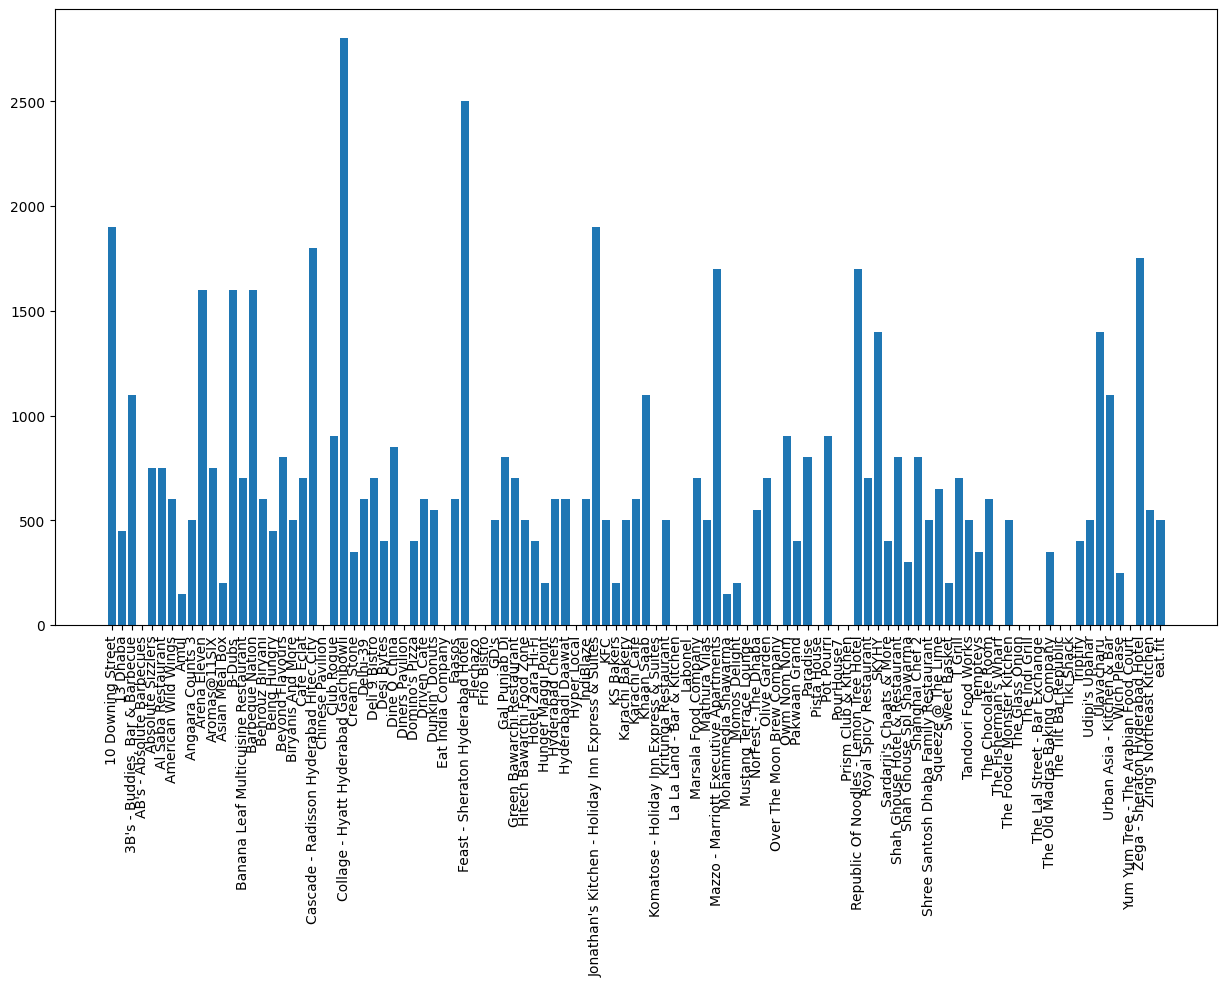

In [ ]:
df= df1.groupby(['Name'])['cost'].sum().reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
plt.bar(df['Name'],df['cost'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76],
 [Text(0, 0, '1 PM to 1 AM'),
  Text(1, 0, '1 PM to 11 PM'),
  Text(2, 0, '1 PM to 2 AM (Mon, Wed-Sun), Tue Closed'),
  Text(3, 0, '10 AM to 1 AM'),
  Text(4, 0, '10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri-Sun)'),
  Text(5, 0, '10 AM to 10 PM'),
  Text(6, 0, '10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fri-Sun)'),
  Text(7, 0, '10 AM to 11 PM'),
  Text(8, 0, '10 AM to 12 Midnight'),
  Text(9, 0, '10 AM to 5 AM'),
  Text(10, 0, '10:30 AM to 11 PM'),
  Text(11, 0, '11 AM to 11 PM'),
  Text(12, 0, '11 AM to 11:30 PM'),
  Text(13, 0, '11 AM 

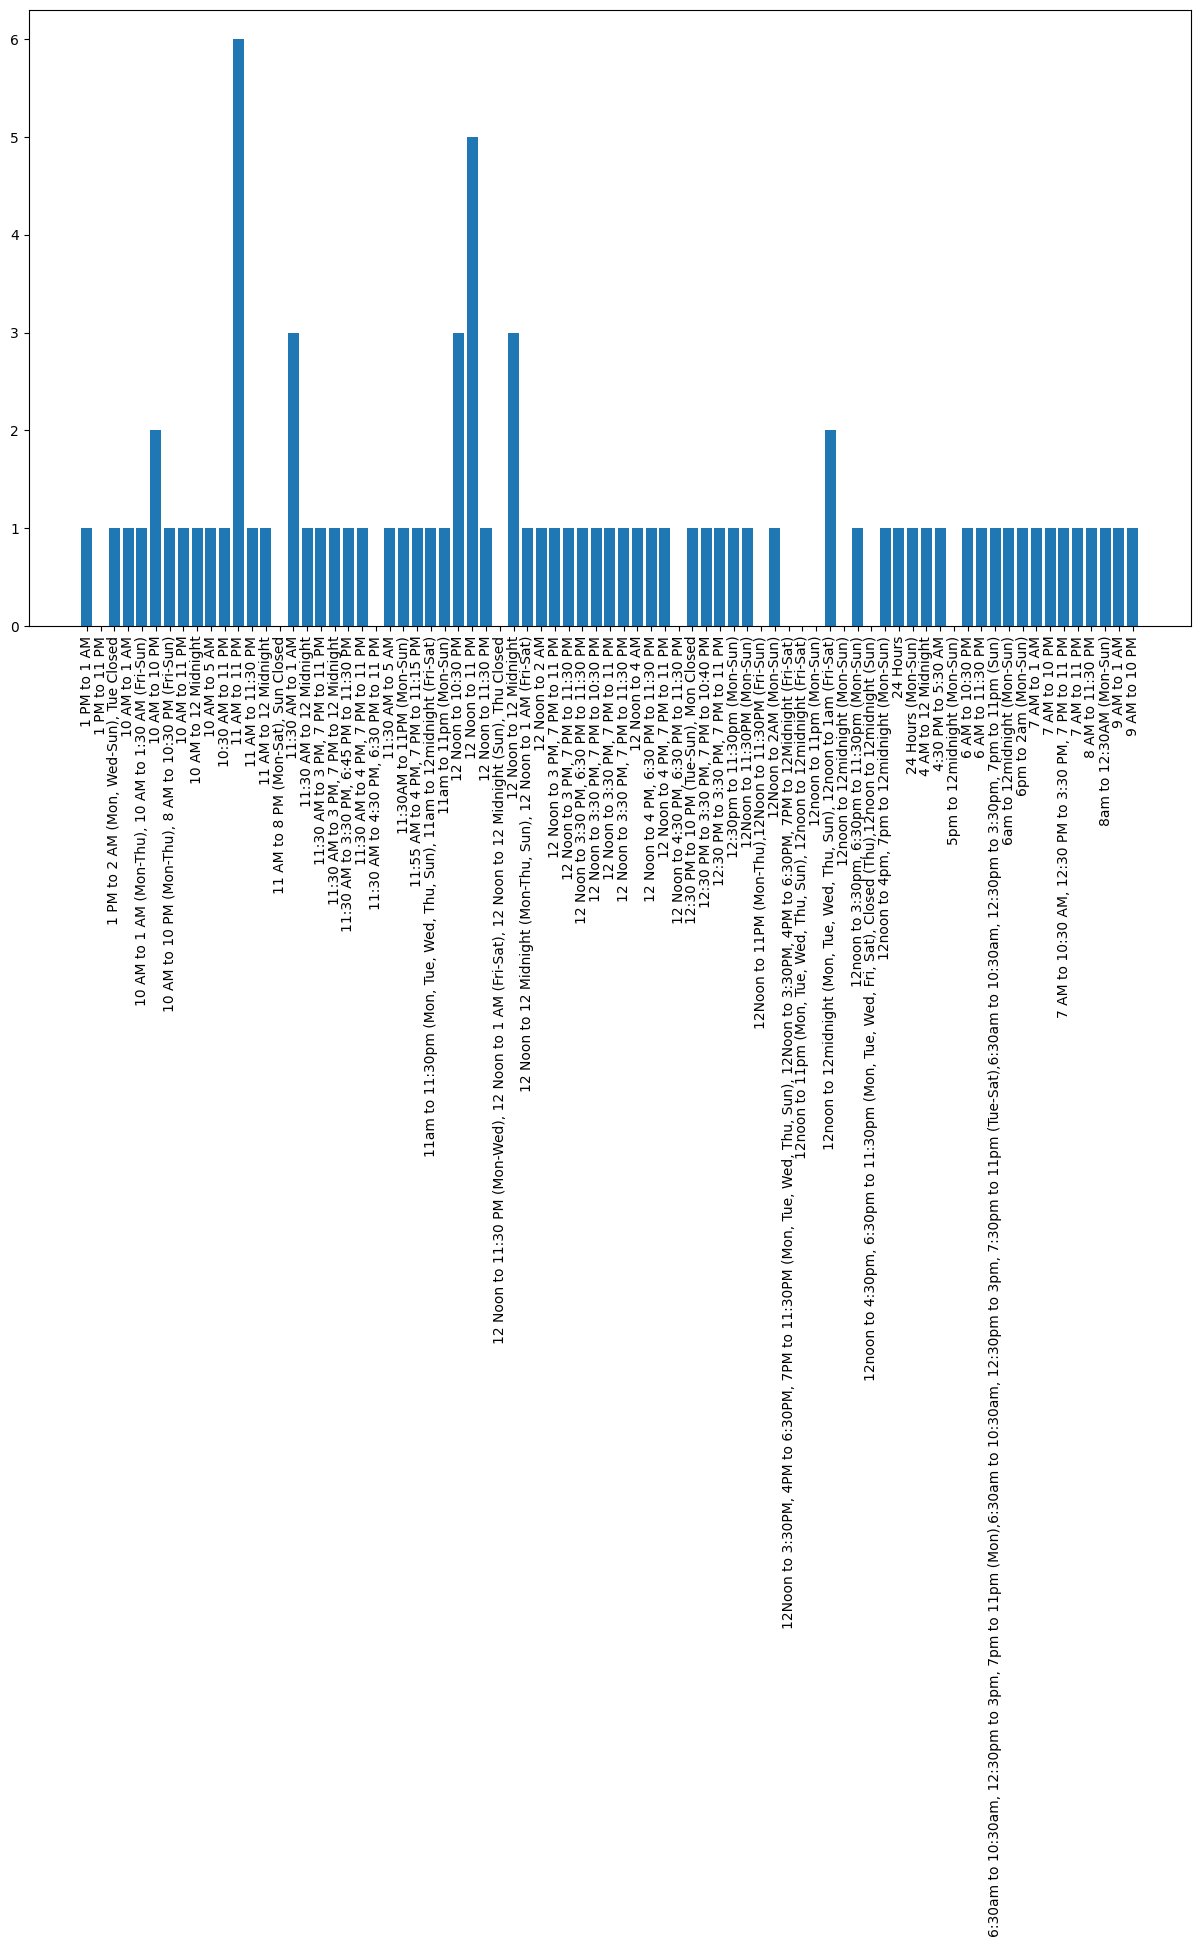

In [ ]:
df = df1.groupby(['Timings'])['cost'].count().reset_index()
fig=plt.figure(figsize=(15,8))
ax= fig.gca()
plt.bar(df['Timings'],df['cost'])
plt.xticks(rotation=90)

# Exploring Dataset2

In [ ]:
rating_trans={
    '5':5,
    '4.5':4.5,
    '4':4,
    '3.5':3.5,
    '3':3,
    '2.5':2.5,
    '2':2,
    '1.5':1.5,
    '1':1,
    'Like':3,
    'nan':1
}
df2['Rateing']=df2.Rating.map(rating_trans)
df2.drop('Rating',inplace=True,axis=1)

<ipython-input-25-a141ca386783>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Rateing)


<Axes: xlabel='Rateing', ylabel='Density'>

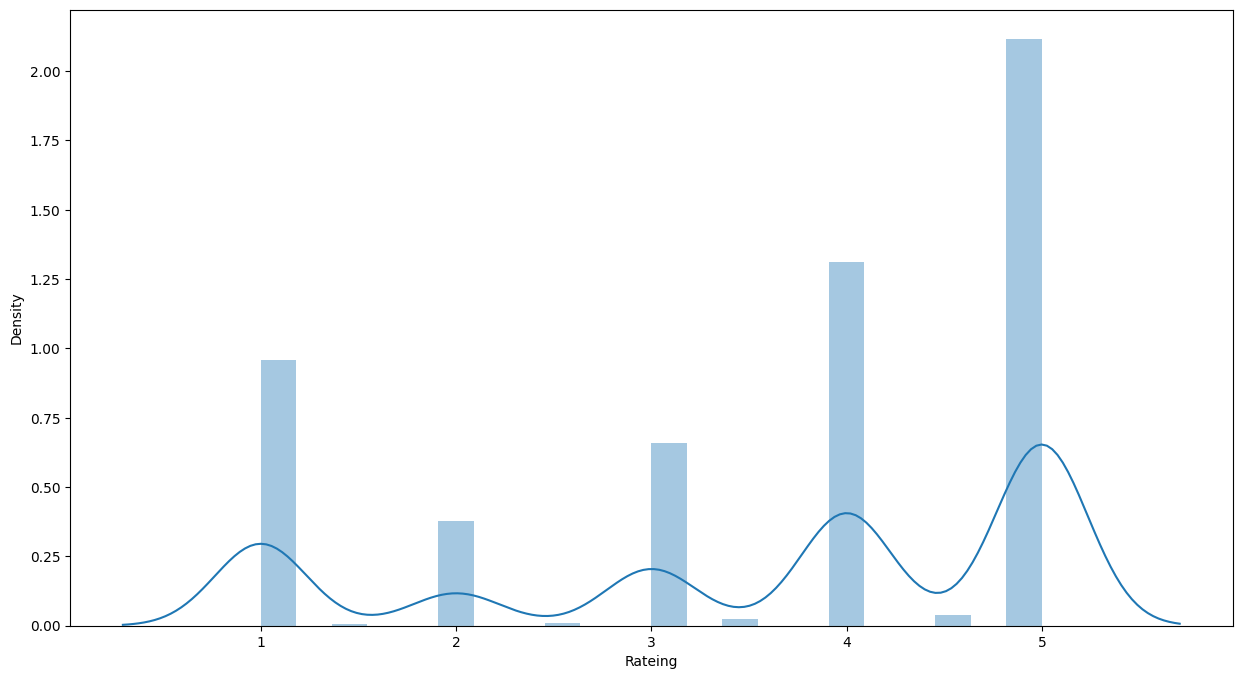

In [ ]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
sns.distplot(df2.Rateing)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99],
 [Text(0, 0, '10 Downing Street'),
  Text(1, 0, '13 Dhaba'),
  Text(2, 0, "3B's - Buddies, Bar & Barbecue"),
  Text(3, 0, "AB's - Absolute Barbecues"),
  Text(4, 0, 'Absolute Sizzlers'),
  Text(5, 0, 'Al Saba Restaurant'),
  Text(6, 0, 'American Wild Wings'),
  Text(7, 0, 'Amul'),
  Text(8, 0, 'Arena Eleven'),
  Text(9, 0, 'Aromas@11SIX'),
  Text(10, 0, 'Asian Meal Box'),
  Text(11, 0, 'B-Dubs'),
  Text(12

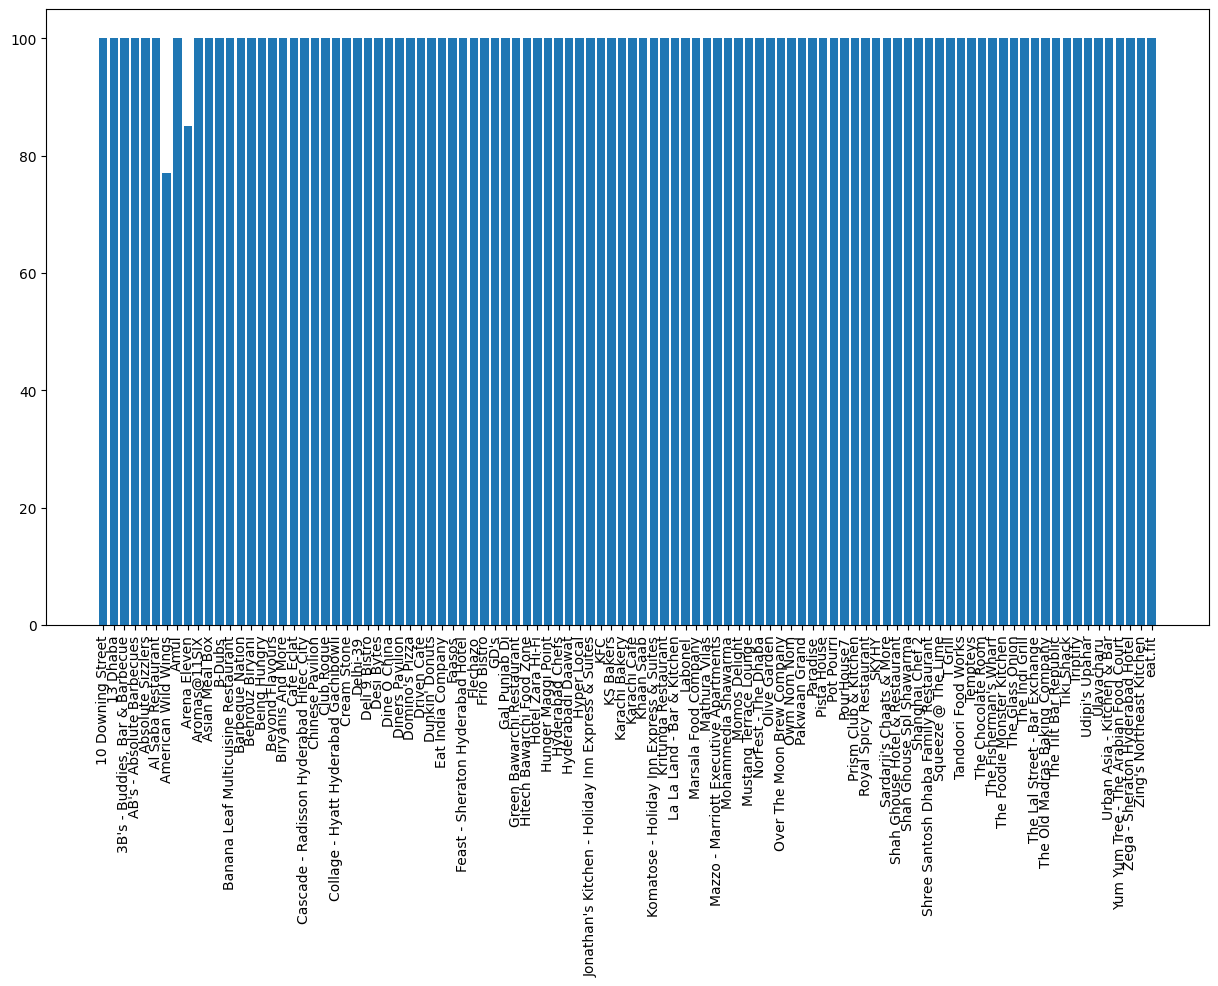

In [ ]:
#The graph shows the relation between restaurant and rating
df=df2.groupby(['Restaurant'])['Rateing'].count().reset_index()
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
plt.bar(df['Restaurant'],df['Rateing'])
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3114 (\N{TELUGU LETTER PA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Telugu natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3149 (\N{TELUGU SIGN VIRAMA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3120 (\N{TELUGU LETTER RA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3108 (\N{TELUGU LETTER TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 3119 (\N{TELUGU LETTER YA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib

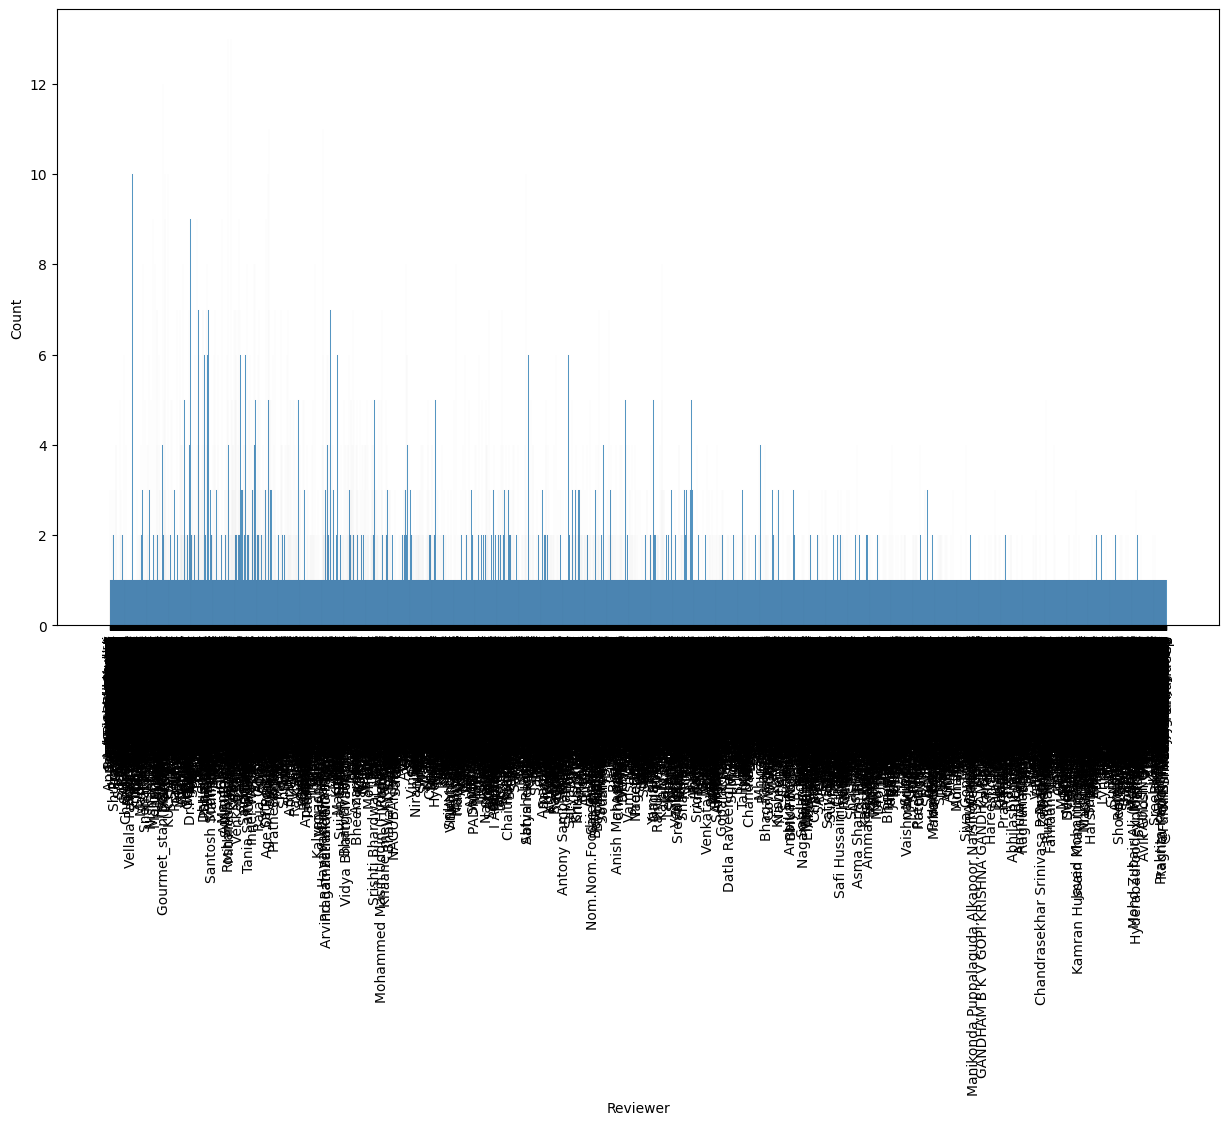

In [ ]:
#The below graph show the distribution of the reviewer
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.histplot(df2.Reviewer)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x7bcf5d534250>,
 [Text(1.0250504333214954, 0.39908847283204585, 'Parijat Ray'),
  Text(0.4853432201896966, 0.9871382672229336, 'Ankita'),
  Text(-0.2796401558412285, 1.0638615432663658, 'Kiran'),
  Text(-0.8710924667982589, 0.6717126724182926, 'Vedant Killa'),
  Text(-1.0995514122313206, 0.03141165166158032, 'Jay Mehta'),
  Text(-0.9253788759906101, -0.5947049149539251, 'Manojkumar D Nambisan'),
  Text(-0.45695648023571767, -1.0005952104475537, 'Priyanka'),
  Text(0.15654637770487598, -1.0888035780743386, 'Age Of Foodies (Suraj Karambe)'),
  Text(0.7203468639465169, -0.8313244827396932, 'Sravani'),
  Text(1.055442297353649, -0.30990572269135586, 'Siva Kumar')])

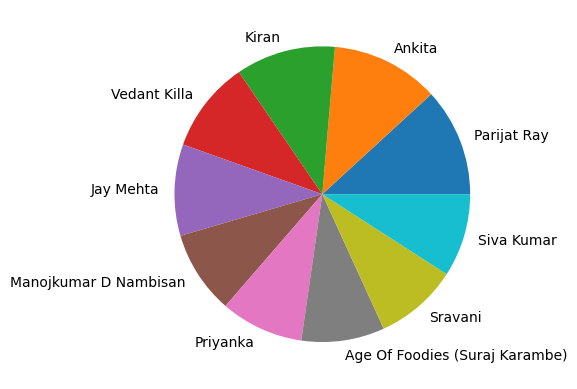

In [ ]:
# Below chart shows the top 10 reviewer
d1 = dict(df2.Reviewer.value_counts())
d1 = dict(sorted(d1.items(),key=lambda item: item[1],reverse=True))
a= list(d1.keys())
b= list(d1.values())
plt.pie(b[:10],labels=a[:10], startangle=0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

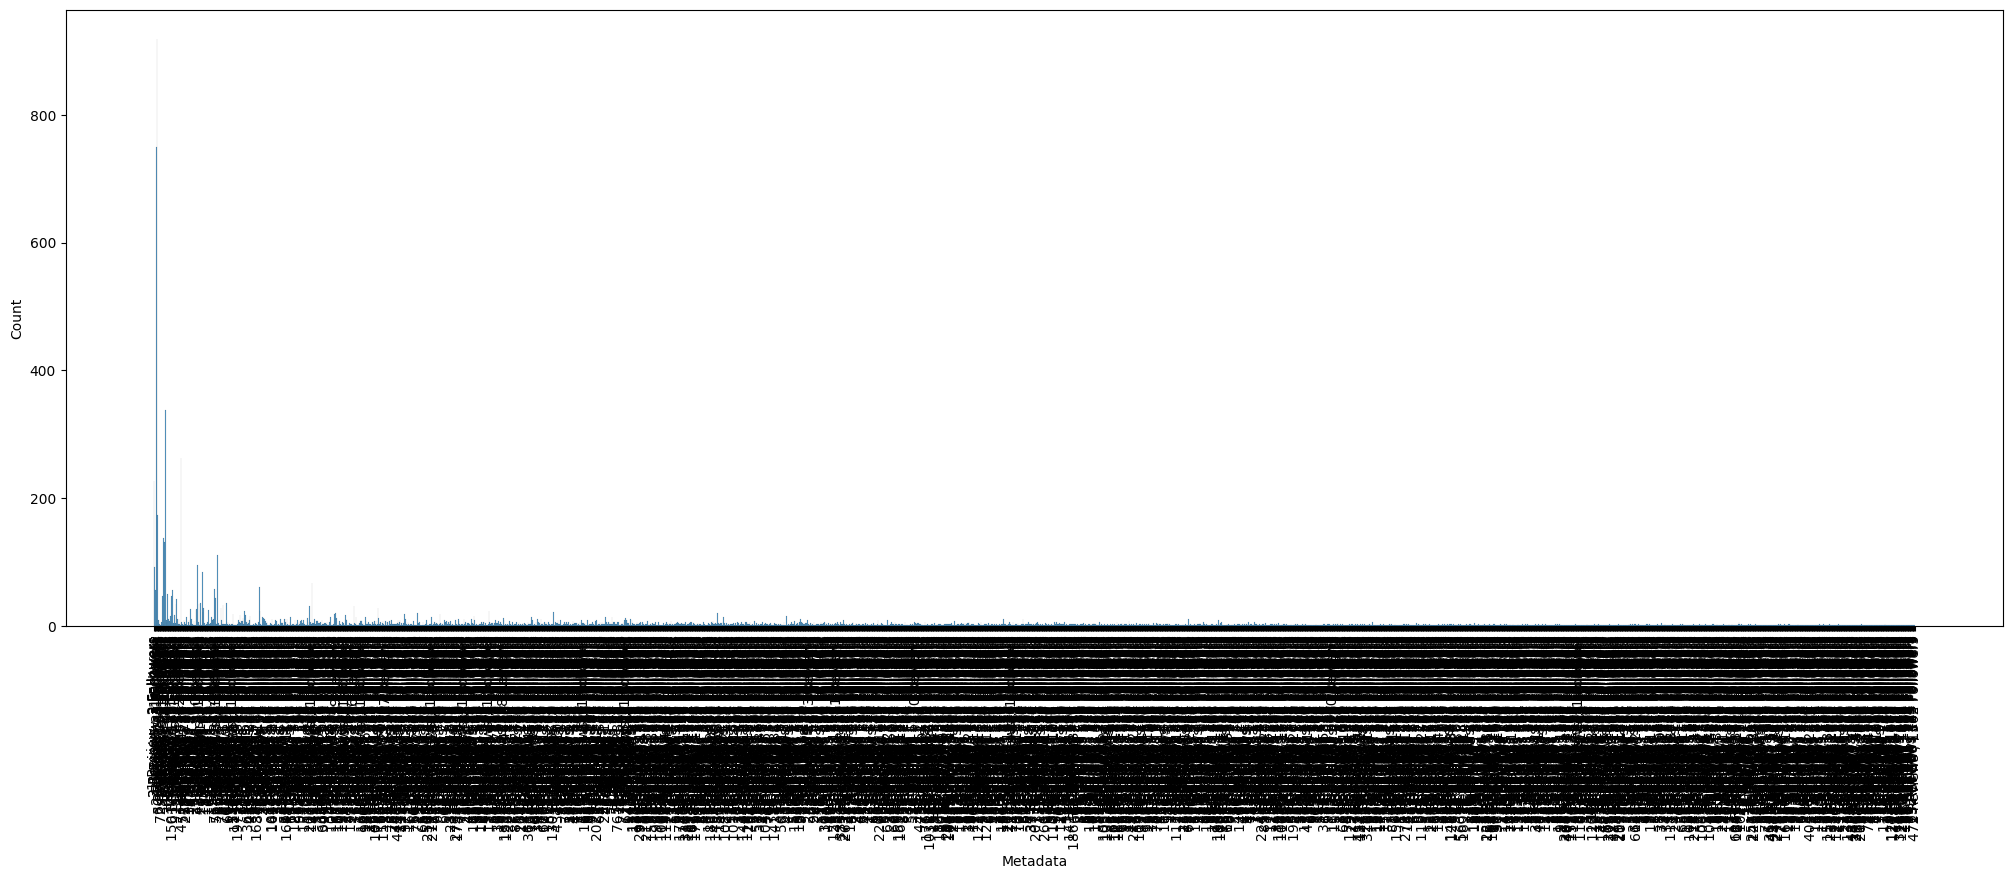

In [ ]:
fig=plt.figure(figsize=(25,8))
ax = fig.gca()
sns.histplot(df2.Metadata)
plt.xticks(rotation=90)

([<matplotlib.patches.Wedge at 0x7bcf470f44f0>,
 [Text(0.667636800368687, 0.8742202827625668, '1 Review'),
  Text(-0.9350344936633124, 0.5794052948151174, '1 Review , 1 Follower'),
  Text(-0.9481066155682576, -0.5577578735577872, '2 Reviews , 1 Follower'),
  Text(-0.46883473193440095, -0.9950849180507152, '2 Reviews'),
  Text(0.05330518964203524, -1.0987076757523935, '1 Review , 2 Followers'),
  Text(0.47677671245016473, -0.9913041745424122, '3 Reviews , 1 Follower'),
  Text(0.7571434821088651, -0.7979559809288121, '2 Reviews , 2 Followers'),
  Text(0.9419168039489985, -0.5681485144207491, '3 Reviews'),
  Text(1.0505884709635436, -0.32598138701233215, '4 Reviews , 1 Follower'),
  Text(1.0950444146464269, -0.10429635636811435, '0 Reviews')])

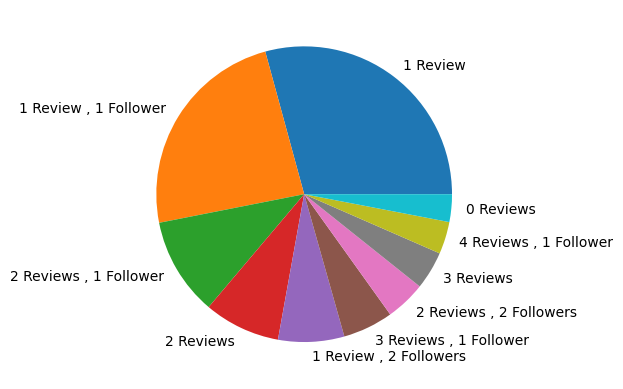

In [ ]:
#The below pie chart shows the top 10 Metadata
d1=dict(df2.Metadata.value_counts())
d1=dict(sorted(d1.items(),key=lambda item: item[1], reverse=True))
a=list(d1.keys())
b=list(d1.values())
plt.pie(b[:10],labels=a[:10],startangle=0)

# Feature Engineering

In [ ]:
df1.isna().sum()

Name            0
Links           0
Collections    54
Cuisines        0
Timings         1
cost           22
dtype: int64

In [ ]:
df2.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Metadata      38
Time          38
Pictures       0
Rateing       38
dtype: int64

In [ ]:
df2.dropna(inplace=True,axis=0)

In [ ]:
#below function will help to split the string using the delemeter "," and return the list of strings.
def cuisines_unique(a):
  crusin_unique=[]
  for i in a:
    cstr=''
    for j in i:
      if j==',':
        crusin_unique.append(cstr)
        cstr=''
      else:
        cstr=cstr+j
    return set(crusin_unique)


In [ ]:
def strp_first_space(x):
  cc=[]
  for i in x:
    if i[0]=='':
      cc.append(i[1:])
    else:
      cc.append(i)
  return cc

In [ ]:
# Creting individual column for each cuisines from all the cuisines available in the string
a=df1['Cuisines'].unique()
b=cuisines_unique(a)
c=list(b)
cc=strp_first_space(c)

In [ ]:
for i in cc:
  df1[i]=df1.Cuisines.apply(lambda x:1 if i in x else 0)

In [ ]:
# Creating a individual columns for each collections from the all the collection available in the string
a=df1['Collections'].unique()
final_list=[]
a=list(a)
for i in a:
  i=str(i)
  l1=i.split(',')
  for j in l1:
    final_list.append(j)
c1=strp_first_space(final_list)

In [ ]:
for i in c1:
  if i!= None or i!='Nan':
    df1[i]=df1.Collections.apply(lambda x:1 if i in str(x) else 0 if str(x)!='Nan' else 0)

In [ ]:
df1.isna().sum()

Name                           0
Links                          0
Collections                   54
Cuisines                       0
Timings                        1
                              ..
 Top Drinking Destinations     0
Gigs and Events                0
Best Bakeries                  0
New on Gold                    0
Brilliant Biryanis             0
Length: 66, dtype: int64

In [ ]:
df1.head()

,Name,Links,Collections,Cuisines,Timings,cost,South Indian,European,Chinese,Continental,Kebab,Food Hygiene Rated Restaurants in Hyderabad,Corporate Favorites,Great Buffets,Top-Rated,Gold Curated,Live Sports Screenings,Hyderabad's Hottest,Great Buffets,Hyderabad's Hottest,Late Night Restaurants,Best Bars & Pubs,Food Hygiene Rated Restaurants in Hyderabad,Sunday Brunches,nan,Best Bars & Pubs,Trending This Week,Frozen Delights,Street Food,Veggie Friendly,Pocket Friendly,Barbecue & Grill,Corporate Favorites,Happy Hours,Rooftops,Trending This Week,Veggie Friendly,Great Italian,Sunday Brunches,Live Sports Screenings,Gigs and Events,Rooftops,Haleem,Mandi,The ‘Must Visit’ Eateries,Top-Rated,Fancy and Fun,Fancy and Fun,Great Breakfasts,Late Night Restaurants,Best shawarmas,Function Venues,Regional Favorites,Pan-Asian Delicacies,Terrific Thalis,Sneak Peek Hyderabad,Great Breakfasts,Function Venues,Ramzan Mubarak,Best Milkshakes,Happy Hours,Top Drinking Destinations,Gigs and Events,Best Bakeries,New on Gold,Brilliant Biryanis
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",800.0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,800.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",NaN,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",NaN,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Engineering for Dataset2

In [ ]:
# Since same information is available in both table with different column name. We'll make it with a sae name
#this will help us to perform joint operation if needed
df2['name']=df2['Restaurant']
df2.drop(['Restaurant'], inplace=True, axis=1)

In [ ]:
# The below function will use to make the Reviews column
def review_collector(x):
  if 'Review' in x and 'Follower' in x:
    l1=x.split(',')
    for i in l1:
      if "Reviews" in i:
        return int(i.strip('Reviews'))
      elif 'Review' in i:
        return int(i.strip('Review'))
      else:
        continue


  elif 'Reviews' in x and 'Follower' not in x:
    return int(x.strip('Reviews'))

  elif 'Review' in x and 'Follower' not in x:
    return int(x.strip('Review'))

  else:
    return 0


In [ ]:
## The below function will use to make the Follower column
def follower_collector(x):
  if 'Review' in x and 'Follower' in x:
    l1= x.split(',')
    for i in l1:
      if 'Followers' in i:
        try:
          return int(i.strip('Followers').strip(' '))
        except:
          return 0
      elif 'Follower' in i:
        try:
          return int(i.strip('Follower').strip(' '))
        except:
          return 0
      elif "'Followers" in i:
        try:
          return int(i.strip('Followers').strip(' '))
        except :
          return 0
      elif 'Follower' in i:
        try:
          return int(i.strip('Follower').strip(' '))
        except:
          return 0
      else:
        continue

  elif 'Followers' in x and 'Review' not in x:
    try:
      return int(x.strip('Followers').strip(' '))
    except:
      return 0
  elif 'Followers' in x and 'Reviews' not in x:
    try:
      return int(x.strip('Followers').strip(' '))
    except:
      return 0
  elif 'Follower' in x and 'Review' not in x:
    try:
      return int(x.strip('Follower').strip(' '))
    except:
      return 0

  elif 'Follower' in x and 'Review' not in x:
    try:
      return int(x.strip('Follower').strip(' '))
    except:
      return 0
  else:
    return 0

In [ ]:
# Creating new Reviews column using above function.
df2['Reviews']=df2.Metadata.apply(review_collector)

ValueError: ignored

In [ ]:
df2['Followers']=df2.Metadata.apply(follower_collector)

In [ ]:
df2[df2['Reviewer']=='Abhishek Mahajan']

,Reviewer,Review,Metadata,Time,Pictures,Rateing,name,Followers
7091,Abhishek Mahajan,They now have Kings beer from Goa. That gives ...,"53 Reviews , 54 Followers",8/25/2018 10:31,1,4.0,Urban Asia - Kitchen & Bar,54
9995,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,"53 Reviews , 54 Followers",6/5/2016 0:08,0,3.0,Chinese Pavilion,54


In [ ]:
df2

,Reviewer,Review,Metadata,Time,Pictures,Rateing,name,Followers
0,Rusha Chakraborty,"The ambience was good, food was quite good . h...","1 Review , 2 Followers",5/25/2019 15:54,0,5.0,Beyond Flavours,2
1,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,"3 Reviews , 2 Followers",5/25/2019 14:20,0,5.0,Beyond Flavours,2
2,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,"2 Reviews , 3 Followers",5/24/2019 22:54,0,5.0,Beyond Flavours,3
3,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,"1 Review , 1 Follower",5/24/2019 22:11,0,5.0,Beyond Flavours,1
4,Dileep,Food is good.we ordered Kodi drumsticks and ba...,"3 Reviews , 2 Followers",5/24/2019 21:37,0,5.0,Beyond Flavours,2
...,...,...,...,...,...,...,...,...
9995,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,"53 Reviews , 54 Followers",6/5/2016 0:08,0,3.0,Chinese Pavilion,54
9996,Sharad Agrawal,This place has never disappointed us.. The foo...,"2 Reviews , 53 Followers",6/4/2016 22:01,0,4.5,Chinese Pavilion,53
9997,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...","65 Reviews , 423 Followers",6/3/2016 10:37,3,1.5,Chinese Pavilion,423
9998,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,"13 Reviews , 144 Followers",5/31/2016 17:22,0,4.0,Chinese Pavilion,144


In [ ]:
df2.isna().count()

Reviewer     9955
Review       9955
Metadata     9955
Time         9955
Pictures     9955
Rateing      9955
name         9955
Followers    9955
dtype: int64

In [ ]:
df2.isna().sum()

Reviewer     0
Review       0
Metadata     0
Time         0
Pictures     0
Rateing      0
name         0
Followers    0
dtype: int64

In [ ]:
# Creating a dictionary as Name_weight based on the restaurant name and it's review frequency
Review_weight=dict(df2.Reviewer.value_counts())
Name_weight=dict(df2.name.value_counts())

In [ ]:
# Assigning the weight based on the frequency of review of the restaurant
df2['Name_weight']=df2.name.map(Name_weight)

In [ ]:
df2['Review_weight']=df2.Reviewer.map(Review_weight)

# **Creating dataset 3 :-**  
**The dataset 3 will contain the copy of dataset 1 and merging sum and mean of few attribute of dataset 2**

In [ ]:
df3=df1.copy()
df3.head()

,Name,Links,Collections,Cuisines,Timings,cost,South Indian,European,Chinese,Continental,Kebab,Food Hygiene Rated Restaurants in Hyderabad,Corporate Favorites,Great Buffets,Top-Rated,Gold Curated,Live Sports Screenings,Hyderabad's Hottest,Great Buffets,Hyderabad's Hottest,Late Night Restaurants,Best Bars & Pubs,Food Hygiene Rated Restaurants in Hyderabad,Sunday Brunches,nan,Best Bars & Pubs,Trending This Week,Frozen Delights,Street Food,Veggie Friendly,Pocket Friendly,Barbecue & Grill,Corporate Favorites,Happy Hours,Rooftops,Trending This Week,Veggie Friendly,Great Italian,Sunday Brunches,Live Sports Screenings,Gigs and Events,Rooftops,Haleem,Mandi,The ‘Must Visit’ Eateries,Top-Rated,Fancy and Fun,Fancy and Fun,Great Breakfasts,Late Night Restaurants,Best shawarmas,Function Venues,Regional Favorites,Pan-Asian Delicacies,Terrific Thalis,Sneak Peek Hyderabad,Great Breakfasts,Function Venues,Ramzan Mubarak,Best Milkshakes,Happy Hours,Top Drinking Destinations,Gigs and Events,Best Bakeries,New on Gold,Brilliant Biryanis
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",800.0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,800.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",NaN,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,800.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",NaN,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
